# Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) are specialized neural networks designed for processing structured grid-like data such as images. CNNs exploit the spatial structure of data by applying convolutional operations to extract meaningful features and reduce the need for manual feature engineering.

## Key Concepts in CNNs

### 1. Convolution Operation
The convolution operation involves a filter (or kernel) sliding over the input data to compute dot products. Mathematically, for an input $x$ and filter $w$, the convolution operation is defined as:
$$
z[i, j] = \sum_{m, n} x[i+m, j+n] \cdot w[m, n]
$$
Here, $z[i, j]$ is the output of the convolution operation at position $(i, j)$.

### 2. Padding and Stride
- **Padding**: Adds borders to the input to control the spatial dimensions of the output. Common types are:
  - Valid (no padding)
  - Same (output dimensions equal input dimensions)
- **Stride**: Controls the step size of the filter during convolution. A larger stride reduces the output size.

### 3. Pooling Layers
Pooling layers reduce the spatial dimensions of the feature maps to minimize computation and prevent overfitting. Common pooling methods include:
- **Max Pooling**: Selects the maximum value in each pooling window.
- **Average Pooling**: Computes the average value in each pooling window.

### 4. Activation Functions
CNNs use activation functions such as ReLU to introduce non-linearity after each convolutional layer:
$$
\text{ReLU}(x) = \max(0, x)
$$

### 5. Fully Connected Layers
After convolution and pooling layers, the features are flattened and passed to fully connected layers for classification or regression.

## CNN Architectures
Popular CNN architectures include:
1. **LeNet**: Early CNN designed for digit recognition.
2. **AlexNet**: Introduced deeper networks with ReLU activations and dropout.
3. **VGG**: Uses very small (3x3) filters but increases depth.
4. **ResNet**: Introduces skip connections to address vanishing gradients in very deep networks.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/Users/pranjal/myenv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - accuracy: 0.8774 - loss: 0.4250 - val_accuracy: 0.9631 - val_loss: 0.1210
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.9684 - loss: 0.1046 - val_accuracy: 0.9675 - val_loss: 0.1050
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - accuracy: 0.9787 - loss: 0.0667 - val_accuracy: 0.9728 - val_loss: 0.0937
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.9845 - loss: 0.0479 - val_accuracy: 0.9750 - val_loss: 0.0822
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.9870 - loss: 0.0399 - val_accuracy: 0.9773 - val_loss: 0.0714
Epoch 1/5


/Users/pranjal/myenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9114 - loss: 0.2872 - val_accuracy: 0.9731 - val_loss: 0.0770
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9848 - loss: 0.0493 - val_accuracy: 0.9884 - val_loss: 0.0353
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9898 - loss: 0.0315 - val_accuracy: 0.9900 - val_loss: 0.0312
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9927 - loss: 0.0228 - val_accuracy: 0.9876 - val_loss: 0.0424
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9948 - loss: 0.0165 - val_accuracy: 0.9875 - val_loss: 0.0415


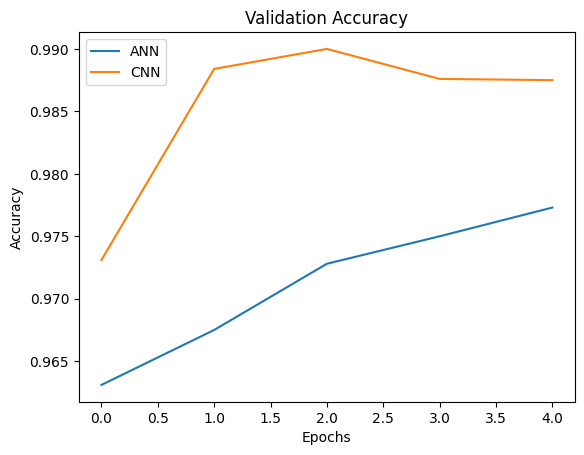

ANN Test Accuracy: 0.9772999882698059
CNN Test Accuracy: 0.987500011920929


In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# ANN Model
def create_ann():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# CNN Model
def create_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and Evaluate ANN
ann = create_ann()
history_ann = ann.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Train and Evaluate CNN
cnn = create_cnn()
history_cnn = cnn.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Plotting Accuracy
plt.plot(history_ann.history['val_accuracy'], label='ANN')
plt.plot(history_cnn.history['val_accuracy'], label='CNN')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Final Test Accuracy
print("ANN Test Accuracy:", ann.evaluate(x_test, y_test, verbose=0)[1])
print("CNN Test Accuracy:", cnn.evaluate(x_test, y_test, verbose=0)[1])
